# VRPTW: Vehicle Routing Problem with Time Windows

The goal is to implement an algorithm based around Ant Colony Optimization (AOC) for the VRPTW.

First we will have a look at the data, then the way we should represent solutions and finally the algorithm.

## Data

The data is the standard dataset 'r101', 'r' for random. It would not be the same in a real production environment where we would probably see some clusters in the distributions of the deliverys points.

In [1]:
import pandas as pd

In [42]:
data = pd.read_csv('./data/r101.txt')
data = data.iloc[5:]
col = data.columns[0]
data[col] = data[col].apply(lambda x : x.split())
data = data[col].apply(pd.Series)
data.columns = ['''CUST NO.   XCOORD.   YCOORD.    DEMAND   READY TIME   DUE DATE   SERVICE TIME'''.split('   ')]
for col in data.columns:
    data[col] = data[col].apply(int)
data.reset_index(drop=True)

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME
0,0,35,35,0,0,230,0
1,1,41,49,10,161,171,10
2,2,35,17,7,50,60,10
3,3,55,45,13,116,126,10
4,4,55,20,19,149,159,10
...,...,...,...,...,...,...,...
96,96,22,27,11,135,145,10
97,97,25,21,12,133,143,10
98,98,19,21,10,58,68,10
99,99,20,26,9,83,93,10


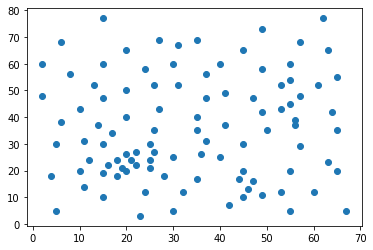

In [44]:
import matplotlib.pyplot as plt

plt.scatter(data['XCOORD.'],data['YCOORD.'])
#plt.plot(x,y)
plt.show()

In [60]:
import numpy as np

D = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        D[i][j] = np.round((i+1)/(j+1), 1)
D

array([[ 1. ,  0.5,  0.3,  0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1],
       [ 2. ,  1. ,  0.7,  0.5,  0.4,  0.3,  0.3,  0.2,  0.2,  0.2],
       [ 3. ,  1.5,  1. ,  0.8,  0.6,  0.5,  0.4,  0.4,  0.3,  0.3],
       [ 4. ,  2. ,  1.3,  1. ,  0.8,  0.7,  0.6,  0.5,  0.4,  0.4],
       [ 5. ,  2.5,  1.7,  1.2,  1. ,  0.8,  0.7,  0.6,  0.6,  0.5],
       [ 6. ,  3. ,  2. ,  1.5,  1.2,  1. ,  0.9,  0.8,  0.7,  0.6],
       [ 7. ,  3.5,  2.3,  1.8,  1.4,  1.2,  1. ,  0.9,  0.8,  0.7],
       [ 8. ,  4. ,  2.7,  2. ,  1.6,  1.3,  1.1,  1. ,  0.9,  0.8],
       [ 9. ,  4.5,  3. ,  2.2,  1.8,  1.5,  1.3,  1.1,  1. ,  0.9],
       [10. ,  5. ,  3.3,  2.5,  2. ,  1.7,  1.4,  1.2,  1.1,  1. ]])

In [64]:
np.sum(D[:][0])

2.8000000000000003

In [65]:
print(1/3 + 2/3)

1.0


In [67]:
a = 1/3
b = 2/3
print(a+b)

1.0
